In [20]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, 
                             precision_score,
                             recall_score, 
                             f1_score,
                             confusion_matrix)
from sklearn import tree

from matplotlib import pyplot as plt
import numpy as np

In [2]:
X, y = datasets.make_moons(n_samples=1000, noise=0.2)

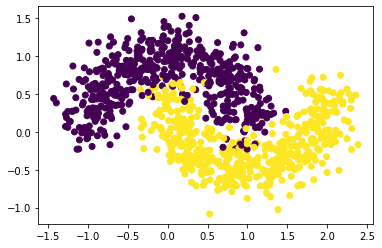

In [4]:
plt.scatter(X[:,0], X[:,1], c = y);

In [6]:
logistic_clf = LogisticRegression(max_iter = 10000)
decision_tree = DecisionTreeClassifier(max_depth=2)
svm_clf = SVC(kernel='linear')

In [7]:
estimators = [
    ('logistic', logistic_clf),
    ('decision tree', decision_tree),
    ('svm', svm_clf)
]

In [8]:
estimators

[('logistic', LogisticRegression(max_iter=10000)),
 ('decision tree', DecisionTreeClassifier(max_depth=2)),
 ('svm', SVC(kernel='linear'))]

In [10]:
voter = VotingClassifier(estimators=estimators, voting='hard')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1010)

In [14]:
for model in [logistic_clf, decision_tree, svm_clf, voter]:
    model.fit(X_train, y_train)
    print(' ==== Model {0} ==== '.format(model.__class__.__name__))
    print(classification_report(y_test, model.predict(X_test)))

 ==== Model LogisticRegression ==== 
              precision    recall  f1-score   support

           0       0.84      0.83      0.83        93
           1       0.85      0.86      0.86       107

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200

 ==== Model DecisionTreeClassifier ==== 
              precision    recall  f1-score   support

           0       0.88      0.98      0.93        93
           1       0.98      0.89      0.93       107

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200

 ==== Model SVC ==== 
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        93
           1       0.85      0.87      0.86       107

    accuracy                           0.85       200
   macro avg       0.85     

In [17]:
X_train

array([[-0.11992114,  1.17121416],
       [ 0.66830622,  0.63906507],
       [ 0.74285704,  0.75469396],
       ...,
       [ 0.60499368,  1.05338552],
       [ 2.01450771,  0.54414093],
       [ 1.73103221,  0.04297227]])

## Random forests

In [18]:
cancer = datasets.load_breast_cancer()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'],
                                                    cancer['target'],
                                                    test_size=0.2,
                                                    random_state=1010

In [44]:
decision_tree = DecisionTreeClassifier()
bag_decision_tree = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                      n_estimators=100,
                                      bootstrap=True)

In [45]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
bag_decision_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [47]:
y_test_clf_dt = decision_tree.predict(X_test)

In [48]:
y_test_clf_bag = bag_decision_tree.predict(X_test)

In [49]:
confusion_matrix(y_test, y_test_clf_dt)

array([[47,  2],
       [ 4, 61]])

In [50]:
confusion_matrix(y_test, y_test_clf_bag)

array([[48,  1],
       [ 3, 62]])

In [51]:
?BaggingClassifier

In [52]:
rforest = RandomForestClassifier(n_estimators=500)

In [53]:
rforest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [54]:
confusion_matrix(y_test, rforest.predict(X_test))

array([[48,  1],
       [ 1, 64]])